In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
data = pd.read_csv('C:\\Users\\Hamid\\Desktop\\Excel\\ext\\Datasalar2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Block_Creation_Delay  759 non-null    int64
 1   Node_Type             759 non-null    int64
 2   Message_Length        759 non-null    int64
 3   Violation_Sum         759 non-null    int64
 4   AverageNetdelay       759 non-null    int64
 5   stored_block          759 non-null    int64
 6   chain_length          759 non-null    int64
 7   CPU_Avg               759 non-null    int64
dtypes: int64(8)
memory usage: 47.6 KB


In [2]:
from sklearn.preprocessing import minmax_scale
scale_data=minmax_scale(data,feature_range=(0,10))
df_data=pd.DataFrame(scale_data,index=data.index,columns=data.columns)
df_data

,Block_Creation_Delay,Device,Node_Type,location,RAM_Avg,Message_Length,Network_Type,Kernel,Battery,Crash_sum,Violation_Sum,AverageNetdelay,stored_block,chain_length,CPU_Avg
0,0.023952,2.0,10.000000,0.0,8.125,2.682927,10.0,10.0,5.268817,0.0,0.000,0.926773,2.919628,5.174825,8.888889
1,9.962076,8.0,3.333333,0.0,5.125,2.682927,5.0,10.0,5.161290,0.0,0.125,9.380244,10.000000,10.000000,10.000000
2,0.045908,0.0,6.666667,0.0,1.375,2.682927,10.0,4.2,7.419355,0.0,0.000,0.382342,2.185646,2.097902,3.222222
3,0.123752,4.0,3.333333,0.0,2.000,2.682927,10.0,0.2,8.494624,0.0,0.000,0.063883,0.214339,1.048951,4.777778
4,0.558882,6.0,3.333333,5.0,9.500,2.682927,10.0,2.0,5.913978,0.0,0.000,0.168764,1.421532,0.069930,1.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2.932136,2.0,3.333333,0.0,5.375,0.243902,10.0,10.0,3.763441,0.0,2.500,3.020595,5.285690,7.412587,4.777778
755,3.399202,8.0,3.333333,0.0,3.500,0.243902,10.0,10.0,2.150538,0.0,9.750,3.824371,4.123410,2.307692,1.222222
756,3.804391,0.0,6.666667,0.0,6.250,0.243902,5.0,4.2,1.505376,0.0,10.000,4.303013,4.675650,3.216783,7.222222
757,0.576846,4.0,3.333333,10.0,2.625,0.243902,5.0,2.0,1.505376,10.0,4.125,0.390923,2.602953,0.699301,8.444444


In [11]:
X = df_data.iloc[:, 1:]
y = df_data.iloc[:, 0]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [4]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

model = LinearRegression()#Initializing RFE model
rfe = RFE(model, 7)#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  #Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True False False False False  True  True  True
  True  True]
[7 1 3 4 1 5 6 8 2 1 1 1 1 1]


C:\Users\Hamid\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [5]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.001646
Best score using built-in LassoCV: 0.831245


In [6]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 14 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

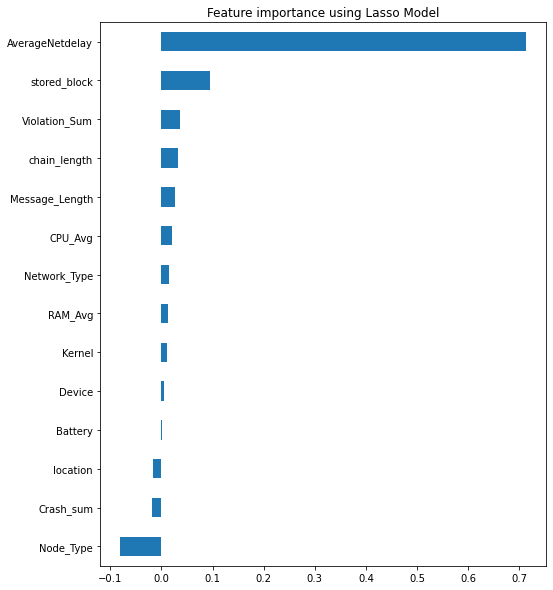

In [7]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

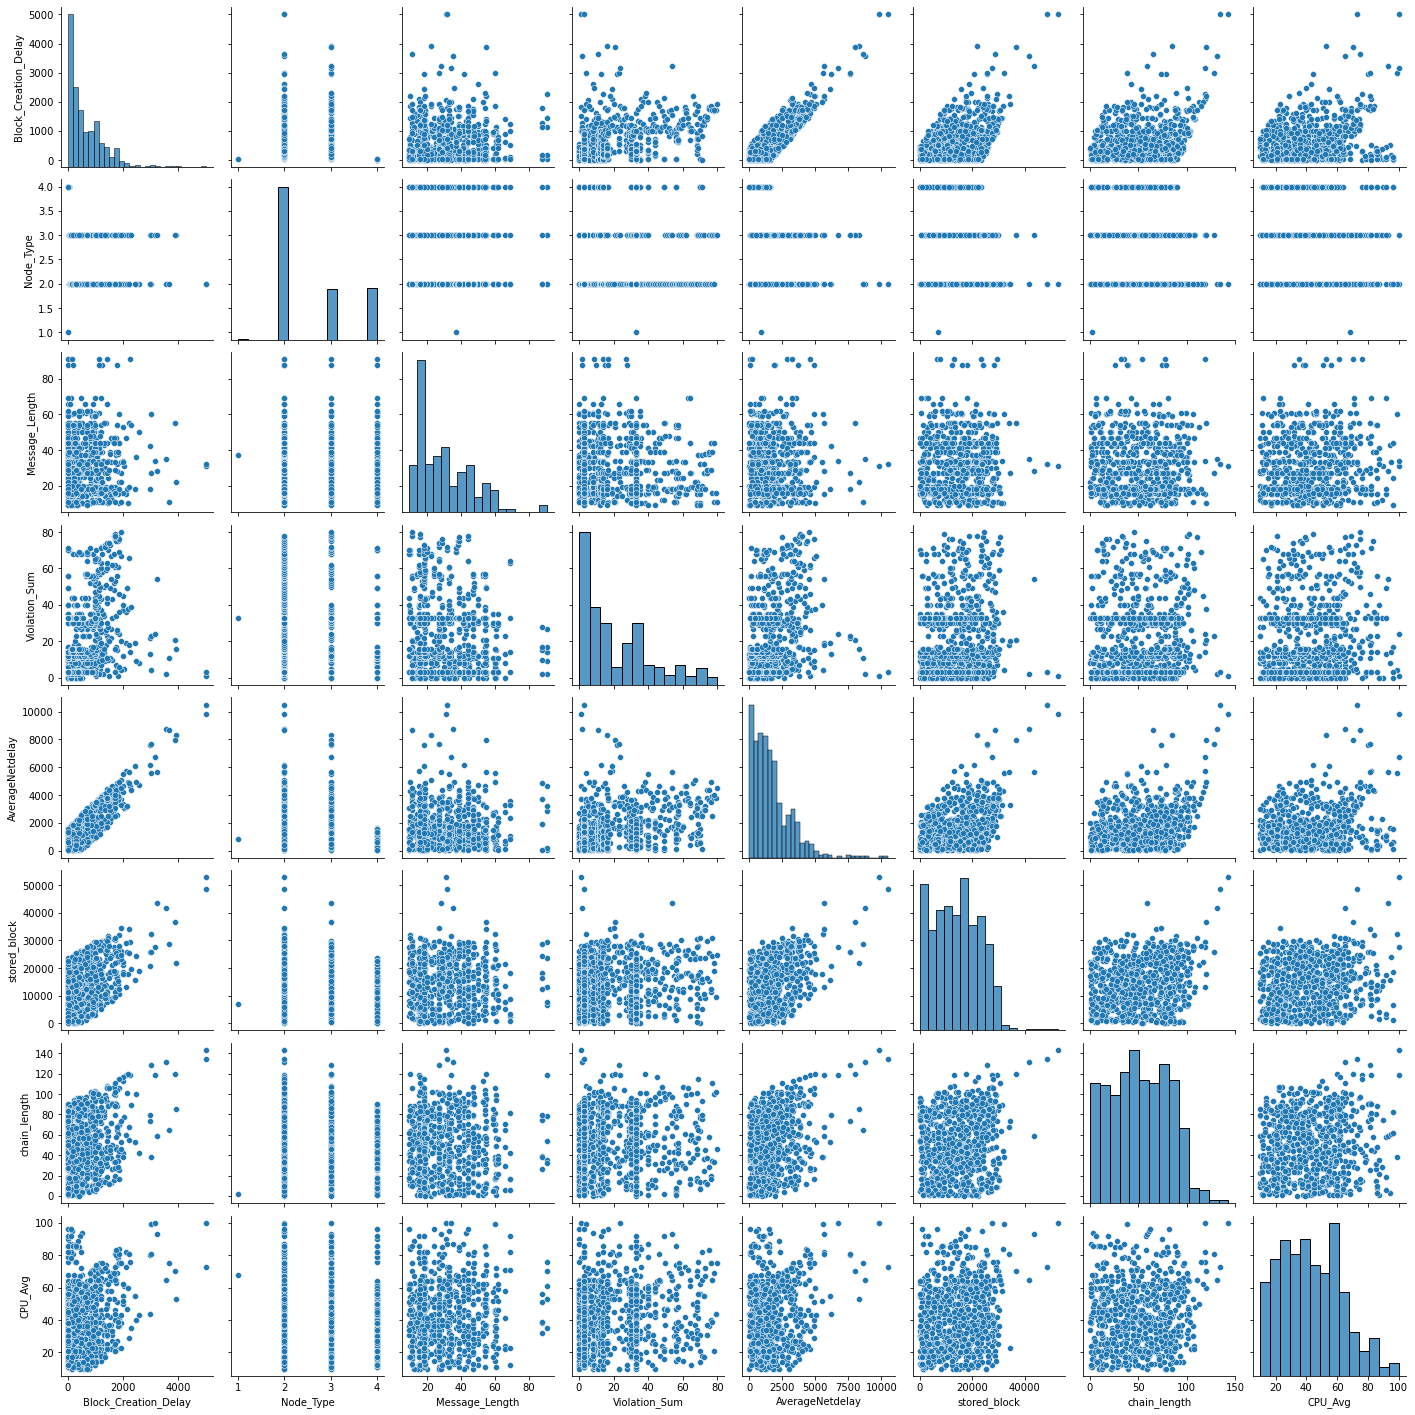

In [10]:
sns.pairplot(data)

C:\Users\Hamid\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Linear: -0.31, 0.085


C:\Users\Hamid\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RandomForest: -0.25, 0.098


C:\Users\Hamid\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Lasso: -0.961, 0.448


C:\Users\Hamid\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ElasticNet: -0.619, 0.286


C:\Users\Hamid\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: -0.519, 0.327


C:\Users\Hamid\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


DecisionTree: -0.495, 0.162


C:\Users\Hamid\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVR: -0.378, 0.268


C:\Users\Hamid\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


AdaBoost: -0.387, 0.092


C:\Users\Hamid\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GradientBoost: -0.257, 0.101


C:\Users\Hamid\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ExtraTrees: -0.237, 0.097


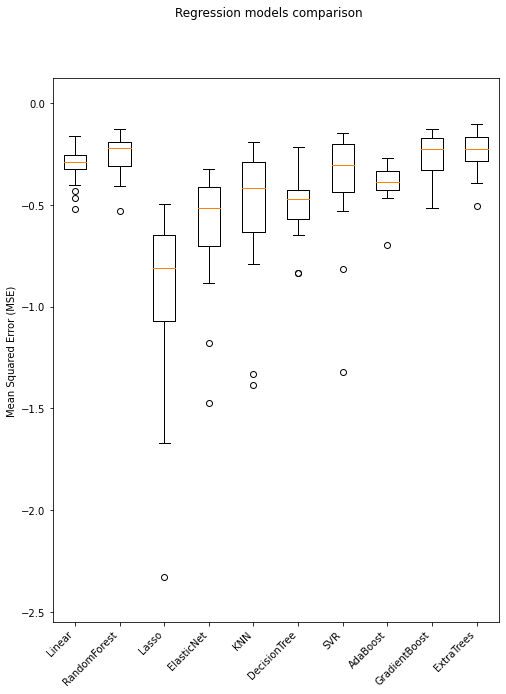

In [12]:
#X = data.iloc[:, :2]
#y = data.iloc[:, 0]
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
import numpy

# In[65]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# user variables to tune
folds   = 20
seed      = 10
metric  = "neg_mean_squared_error"


# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["RandomForest"]  = RandomForestRegressor()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()

models["ExtraTrees"]    = ExtraTreesRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=metric)
    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
#plt.savefig("model_mse_scores.png")
#plt.clf()
plt.show()

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
rf = GradientBoostingRegressor(random_state = 42)
from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


# In[12]:


from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


# In[13]:


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(x_train, y_train)


# In[14]:


rf_random.best_params_

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.1min finished


{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [22]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn import ensemble
from sklearn import linear_model
#reg = linear_model.Lasso(alpha=0.001, normalize=True)
#folds=10
#lasso = linear_model.Lasso()
reg =ensemble.RandomForestRegressor(n_estimators=1600,min_samples_split=5,min_samples_leaf=1,max_features='auto',max_depth=90,bootstrap=True)

#k_fold  = KFold(n_splits=folds, random_state=seed)
#results = cross_val_score(lasso, x_train, y_train, cv=k_fold, scoring=metric)
#predictions = cross_val_predict(lasso, x_train, y_train, cv=3)
reg.fit(x_train, y_train)
result = reg.score(x_test, y_test)
y_pred = reg.predict(x_test)

a = (abs(y_pred - y_test)/y_test)*100
#print(a)
mse = metrics.mean_squared_error(y_test, y_pred)
mse
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)
print(r2)

MAE 0.3581049922300834
RMSE 0.5140061183587336
0.8839879305968436


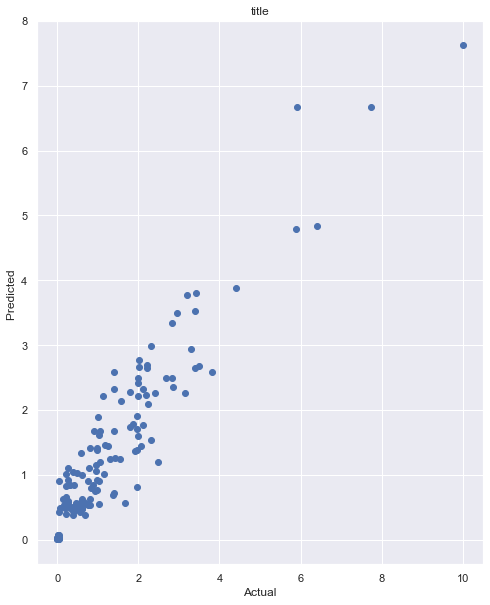

In [17]:
import seaborn as sns
sns.set() # use Seaborn styles
plt.scatter(y_test,y_pred)
plt.plot(range(1), range(1))
plt.xlabel("Actual")
plt.ylabel("Predicted ")
plt.title("title")
plt.show()

In [ ]:
#khodet Test Kon
X_1 = sm.add_constant(X)#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        breakselected_features_BE = cols
print(selected_features_BE)

In [41]:
pd.DataFrame(y_test).to_excel('C:\\Users\\Hamid\\Desktop\\Excel\\ext\\act.xlsx', header='actual', index=False)

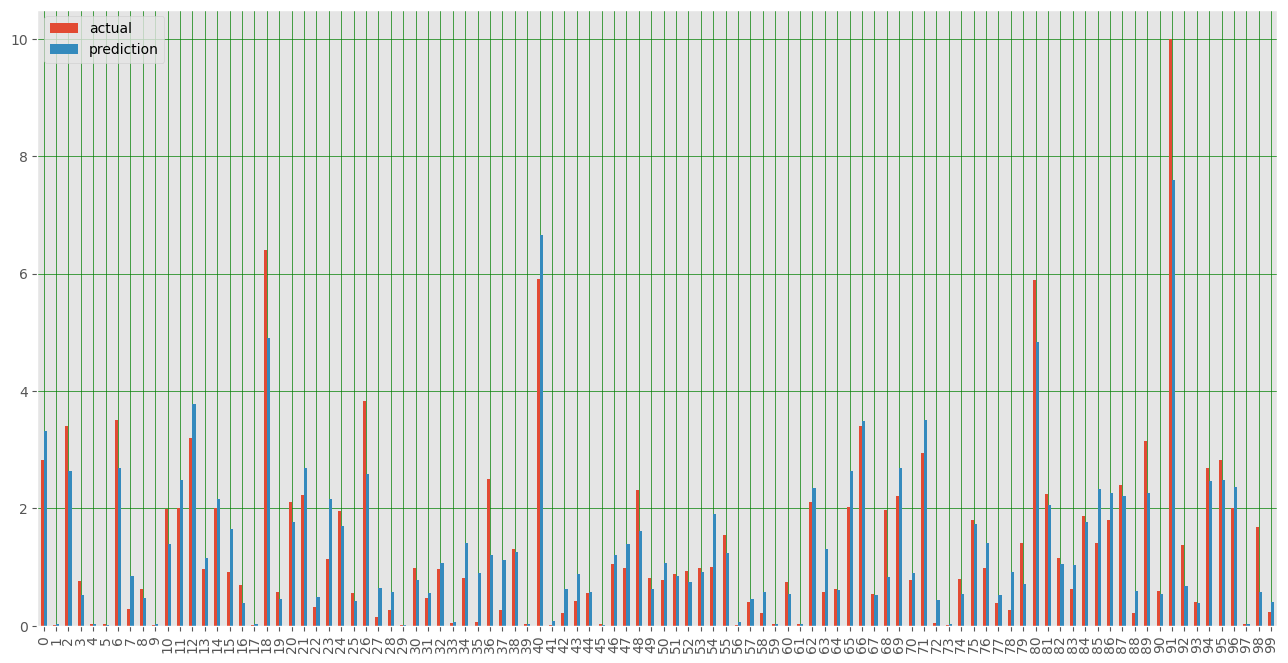

In [47]:
df = pd.read_excel('C:\\Users\\Hamid\\Desktop\\Excel\\ext\\pred.xlsx')
df1 = df.head(100)
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

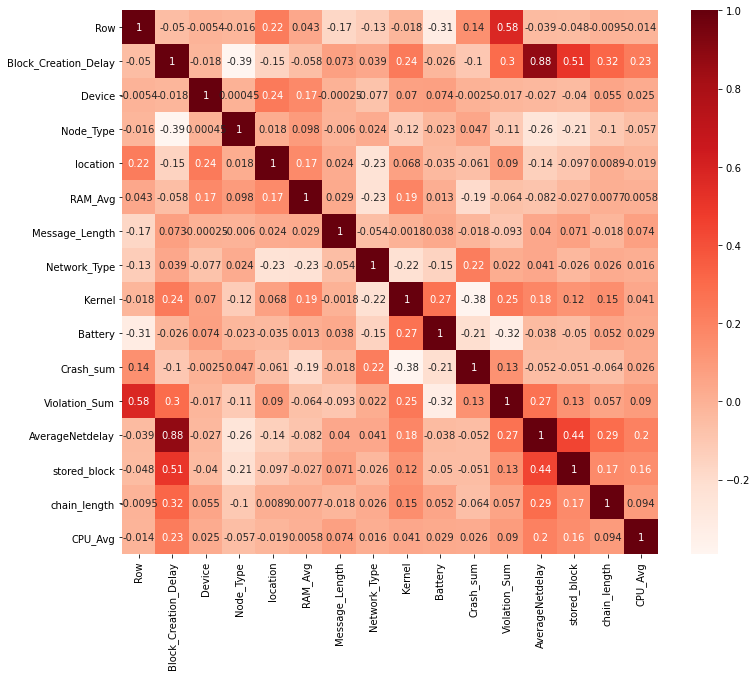

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_excel('C:\\Users\\Seyed salar\\Downloads\\Finaldata.xlsx')
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

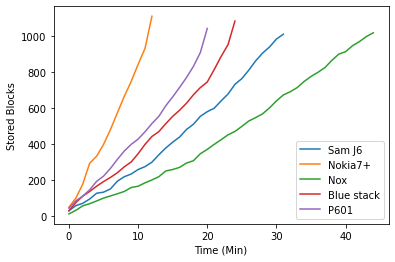

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_excel('C:\\Users\\Seyed salar\\Desktop\\sam J6.xlsx')
plt.plot(data['Stored_block'])
data1 = pd.read_excel('C:\\Users\\Seyed salar\\Desktop\\Nokia 7+.xlsx')
plt.plot(data1['Stored_Block'])
data2 = pd.read_excel('C:\\Users\\Seyed salar\\Desktop\\Nox.xlsx')
plt.plot(data2['Stored_Block'])
data3 = pd.read_excel('C:\\Users\\Seyed salar\\Desktop\\Blue stack.xlsx')
plt.plot(data3['Stored_Block'])
data4 = pd.read_excel('C:\\Users\\Seyed salar\\Desktop\\P601.xlsx')
plt.plot(data4['Stored_Block'])
plt.xlabel("Time (Min)")
plt.ylabel("Stored Blocks")
plt.legend(["Sam J6", "Nokia7+", "Nox", "Blue stack" ,"P601"], loc ="lower right")




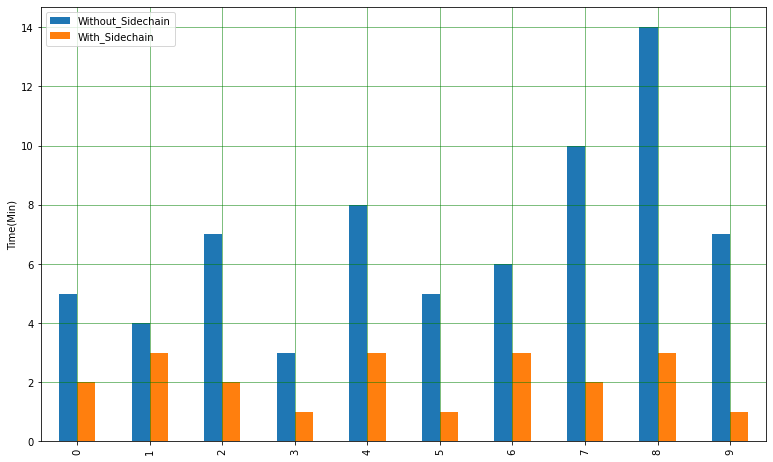

In [21]:
df = pd.read_excel('C:\\Users\\Seyed salar\\Desktop\\Sidechain.xlsx')
df1 = df.head(20)
df1.plot(kind='bar',figsize=(13,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('Time(Min)')
plt.show()